In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('USA_Housing.csv') # distribution  - Regression

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.drop('Address', axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.4 KB


In [7]:
import seaborn as sns

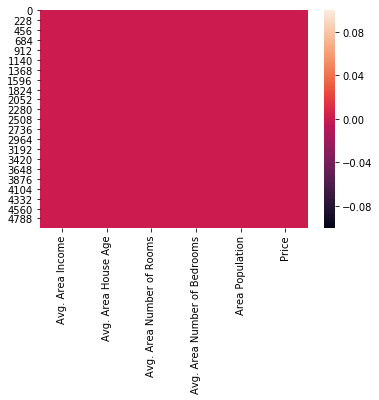

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


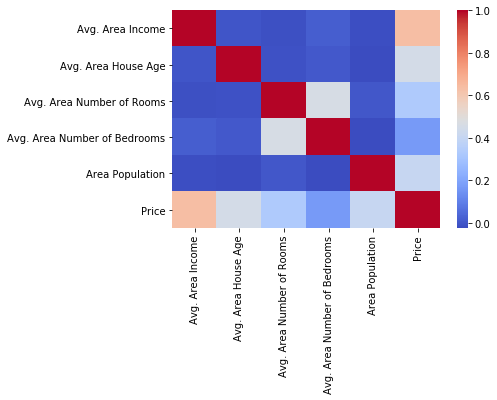

In [11]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [13]:
#in above map AVG..room is corelated with price that is why we are removing the column Avg..bedrooms
#1 means perfectly co-remated & o means low co-remated

In [14]:
df.drop('Avg. Area Number of Bedrooms', axis = 1, inplace = True)

In [15]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [16]:
#standerd Scale

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()

In [19]:
scaled_array = ss.fit_transform(df.drop('Price', axis = 1)) #used to create the matrix withou price

In [20]:
scaled_array

array([[ 1.02865969, -0.29692705,  0.02127433, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  1.04162464]])

In [21]:
scaled_array.shape

(5000, 4)

In [22]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price'],
      dtype='object')

In [24]:
x = pd.DataFrame(data = scaled_array, columns= df.columns[:-1])

In [25]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [26]:
type(x)

pandas.core.frame.DataFrame

In [27]:
y =  df['Price']

In [28]:
type(y)

pandas.core.series.Series

In [29]:
type(x)

pandas.core.frame.DataFrame

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [33]:
x_train.shape

(3500, 4)

In [34]:
y_train.shape

(3500,)

In [35]:
x_test.shape

(1500, 4)

In [36]:
y_test.shape

(1500,)

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
model.coef_

array([230591.32116322, 165176.66384882, 122349.20690021, 151969.10712054])

In [44]:
model.intercept_

1232445.2732691248

In [45]:
model.predict(x_test)

array([ 153561.34974677, 1634967.13627939, 1214123.29174849, ...,
       1699819.07996555, 1276350.99650433,  969636.98276832])

In [46]:
ypred = model.predict(x_test)

In [47]:
len(ypred)

1500

In [48]:
len(y_test)

1500

In [49]:
import  matplotlib.pyplot as plt

(array([  7.,  27., 107., 200., 337., 323., 280., 141.,  57.,  21.]),
 array([-320297.13428881, -259482.53538549, -198667.93648218,
        -137853.33757886,  -77038.73867555,  -16224.13977223,
          44590.45913108,  105405.0580344 ,  166219.65693771,
         227034.25584103,  287848.85474434]),
 <a list of 10 Patch objects>)

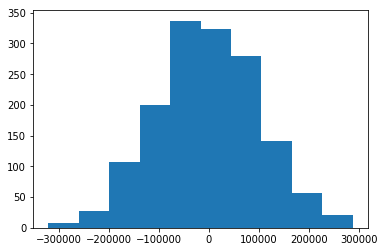

In [50]:
plt.hist(y_test - ypred)

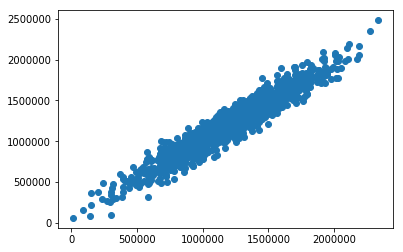

In [53]:
plt.scatter(y_test, ypred)

In [56]:
(y_test-ypred).mean()

-1242.0637558928602

In [58]:
from sklearn import metrics

In [59]:
metrics.mean_absolute_error(y_test, ypred)

81159.78231872464

In [60]:
abs(y_test-ypred).mean()

81159.78231872481